<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
#install specific version of libraries used in lab
!pip install pandas
!pip install numpy
!pip install scipy
!pip install seaborn
!pip install matplotlib
!pip install statsmodels 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
boston_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [4]:
# Tarea 1
# Familiarizarse con los datos Familiarizarse con el conjunto de datos

In [5]:
#Mostrar las primeras 5 filas
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
#Tipos de datos de cada columna
boston_df.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
LSTAT         float64
MEDV          float64
dtype: object

In [7]:
#Comprobar valores faltantes
boston_df.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64

In [8]:
#Comprobar filas duplicadas
boston_df.duplicated().sum()

np.int64(0)

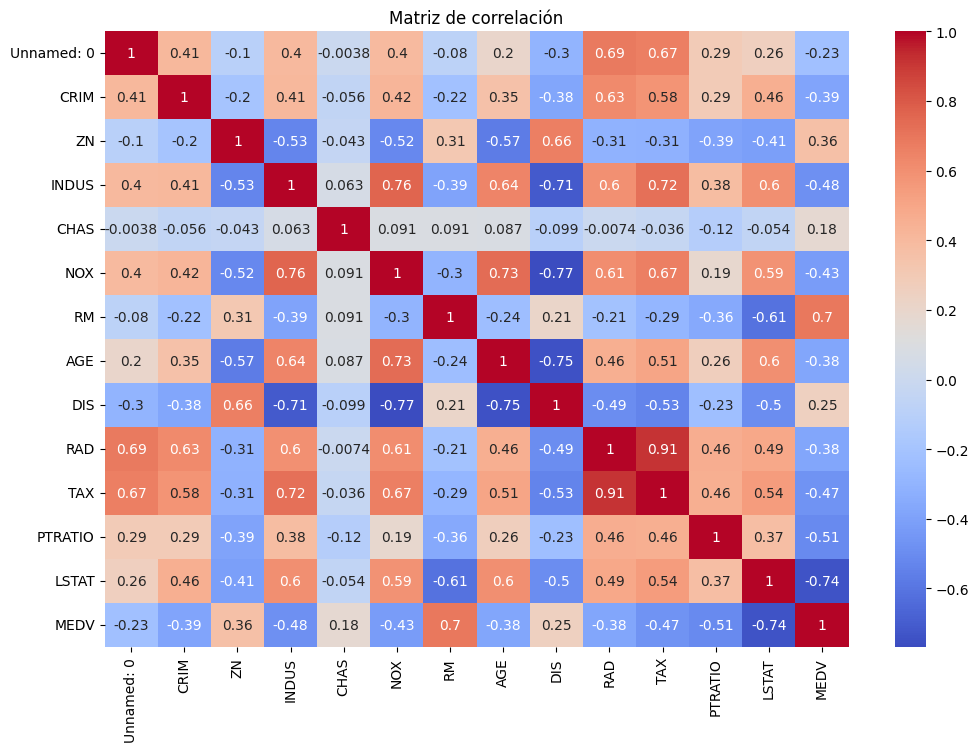

In [9]:
#Matriz de correlaciones
pyplot.figure(figsize=(12,8))
sns.heatmap(boston_df.corr(), annot=True, cmap="coolwarm")
pyplot.title("Matriz de correlación")
pyplot.show()

In [10]:
#Tarea 2: Generar estadísticas descriptivas y visualizaciones

In [11]:
#Muestre las estadísticas descriptivas del conjunto de datos.
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


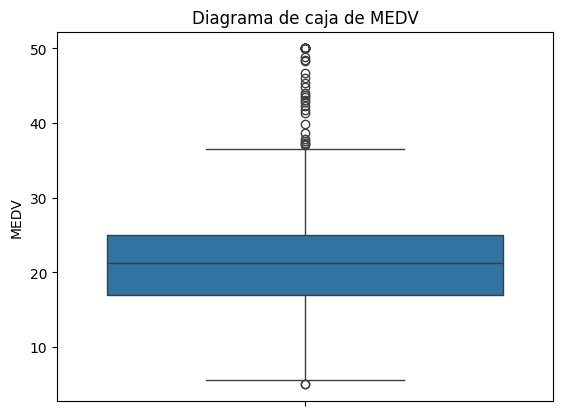

In [12]:
#Cree un diagrama de caja para MEDV (Valor medio de las viviendas ocupadas por sus propietarios).
sns.boxplot(y=boston_df['MEDV'])
pyplot.title("Diagrama de caja de MEDV")
pyplot.show()

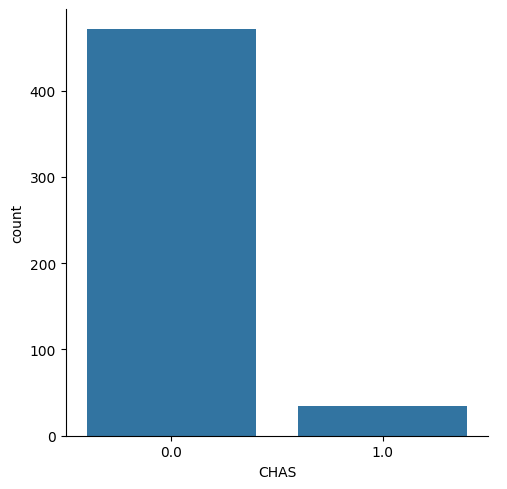

In [13]:
#Cree un gráfico de barras para CHAS (Variable ficticia de Charles River).
sns.catplot(x='CHAS', kind='count', data=boston_df)
pyplot.show()

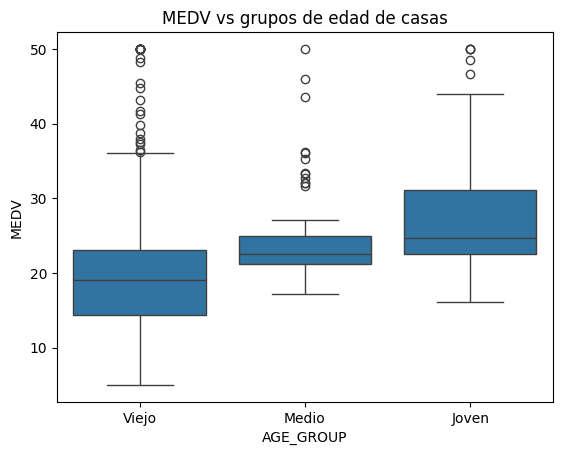

In [14]:
#Discretice la EDAD en tres grupos y cree un diagrama de caja de MEDV 
#frente a estos grupos:
boston_df.loc[(boston_df['AGE'] <= 40), 'AGE_GROUP'] = 'Joven'
boston_df.loc[(boston_df['AGE'] > 40)&(boston_df['AGE'] < 57), 'AGE_GROUP'] = 'Medio'
boston_df.loc[(boston_df['AGE'] >= 57), 'AGE_GROUP'] = 'Viejo'

sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
pyplot.title("MEDV vs grupos de edad de casas")
pyplot.show()

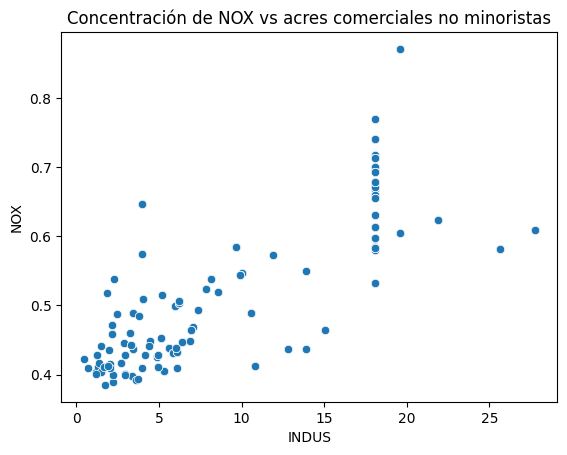

In [15]:
#Crear un diagrama de dispersión que muestre la relación entre NOX 
#(concentraciones de óxido nítrico) e INDUS (acres comerciales no minoristas).
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title("Concentración de NOX vs acres comerciales no minoristas")
pyplot.show()

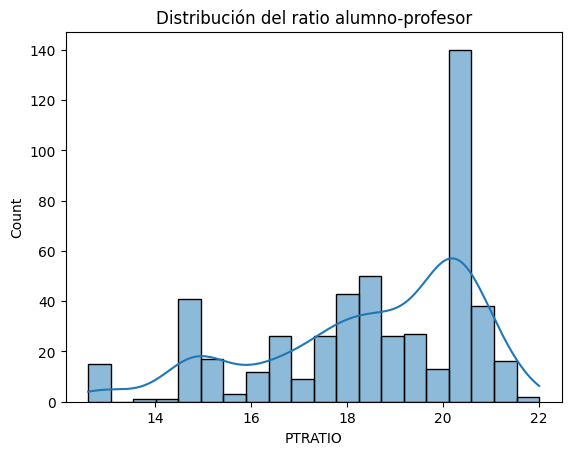

In [16]:
#Crear un histograma para PTRATIO (ratio alumno-profesor).
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
pyplot.title("Distribución del ratio alumno-profesor")
pyplot.show()

In [17]:
#Tarea 3: Aplicar pruebas estadísticas

In [18]:
#Utilizar la prueba de Levene para comprobar si las varianzas de MEDV para las viviendas delimitadas por el río Charles(CHAS = 1) y 
#las no delimitadas(CHAS = 0) son iguales.
from scipy.stats import levene

group0 = boston_df[boston_df['CHAS']==0]['MEDV']
group1 = boston_df[boston_df['CHAS']==1]['MEDV']

stat, p = levene(group0, group1)

#print(f"Levene stat={stat:.3f}, p={p:.3f}")
print(f"Levene stat={stat}, p={p}")

#Interpretación:
#    p > 0.05 → varianzas iguales
#    p ≤ 0.05 → varianzas diferentes


Levene stat=4.590342218715871, p=0.03263097600633006


In [19]:
#Realice una prueba T para determinar si existe una diferencia significativa en el MEDV 
#entre las viviendas delimitadas y no delimitadas por el río Charles.
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(group0, group1, equal_var=True)
#print(f"T={t_stat:.3f}, p={p_val:.3f}")
print(f"T t_stat={t_stat}, p={p_val}")

# Interpretación: Determina si la diferencia en MEDV entre casas cerca del
# río y no es significativa.


T t_stat=-3.996437466090509, p=7.390623170519905e-05


In [20]:
# Realice una prueba ANOVA para comparar el MEDV entre los tres grupos de EDAD creados
# anteriormente.
from scipy.stats import f_oneway

young = boston_df[boston_df['AGE_GROUP']=="Joven"]['MEDV']
medium = boston_df[boston_df['AGE_GROUP']=="Medio"]['MEDV']
old = boston_df[boston_df['AGE_GROUP']=="Viejo"]['MEDV']

F_stat, p_val = f_oneway(young, medium, old)
#print(f"F={F_stat:.3f}, p={p_val:.3f}")
print(f"F={F_stat}, p={p_val}")

#nterpretación: Evalúa si las casas de distinta antigüedad tienen precios significativamente diferentes.

F=28.614101859178216, p=1.7004292934854466e-12


In [21]:
# Realizar una prueba de correlación de Pearson para evaluar la relación entre NOX 
# e INDUS.
from scipy.stats import pearsonr

r, p_val = pearsonr(boston_df['NOX'], boston_df['INDUS'])
#print(f"r={r:.3f}, p={p_val:.3f}")
print(f"r={r}, p={p_val}")
#Interpretación: Determina si existe relación lineal entre contaminación y actividad comercial.



r=0.7636514469209154, p=7.913361061239639e-98


In [22]:
# Ajuste un modelo de regresión lineal simple para evaluar el impacto de DIS (distancia a 
# los centros de empleo) en MEDV. Informar e interpretar los resultados de la regresión.
import statsmodels.api as sm

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)  # agrega intercepto
model = sm.OLS(y, X).fit()
print(model.summary())

#Interpretación:
#    Coeficiente de DIS → cuánto cambia MEDV por cada unidad de distancia a centros de empleo.
#    R² → proporción de variabilidad explicada.
#    p-valor → significancia del coeficiente.

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 06 Jan 2026   Prob (F-statistic):           1.21e-08
Time:                        17:26:37   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0